<a href="https://colab.research.google.com/github/NastuaBudko/machine_learning/blob/main/%D0%91%D1%83%D0%B4%D0%BA%D0%BE_%D0%BF%D1%808.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Будко А.С. ФІТ 4-8 Варіант 4

# Завдання 1

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

1. Завантажити датасет

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2. Роздрукувати 10 зображень.

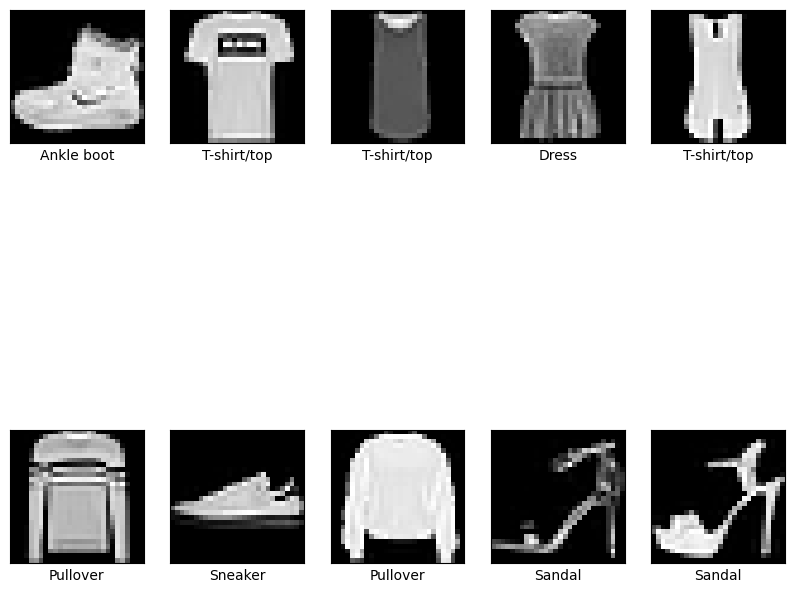

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()


3. Підготовувати дані, побудувати архітектуру

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Використати ранню зупинку і зменшення швидкості для запобіганню
перенавчанню.

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 41ms/step - accuracy: 0.7287 - loss: 0.7313 - val_accuracy: 0.8685 - val_loss: 0.3618 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.8687 - loss: 0.3554 - val_accuracy: 0.8819 - val_loss: 0.3353 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.8927 - loss: 0.2949 - val_accuracy: 0.8905 - val_loss: 0.3031 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9072 - loss: 0.2555 - val_accuracy: 0.8898 - val_loss: 0.3069 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.9106 - loss: 0.2398 - val_accuracy: 0.9051 - val_loss: 0.2668 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 74s 35ms/step - accuracy: 0.9202 - loss: 0.2105 - val_accuracy: 0.9038 - val_loss: 0.2640 - learning_rate: 0.0010
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accura

5. Вивести архітектуру моделі.

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

6. Зберегти модель на гугл диск.


In [7]:
model.save('/content/drive/My Drive/fashion_mnist_model.h5')

7. Побудувати графіки функції втрат і точності для тренувальних і
тестових даних.

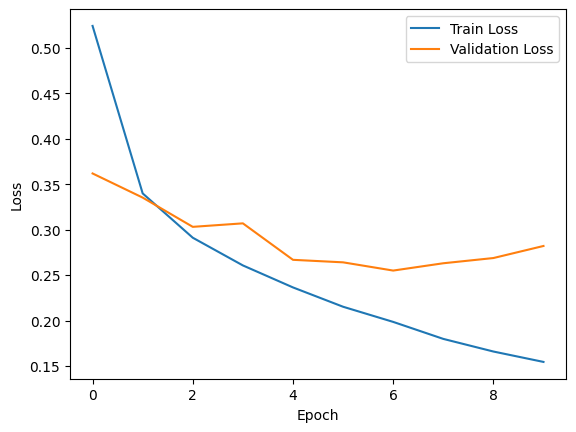

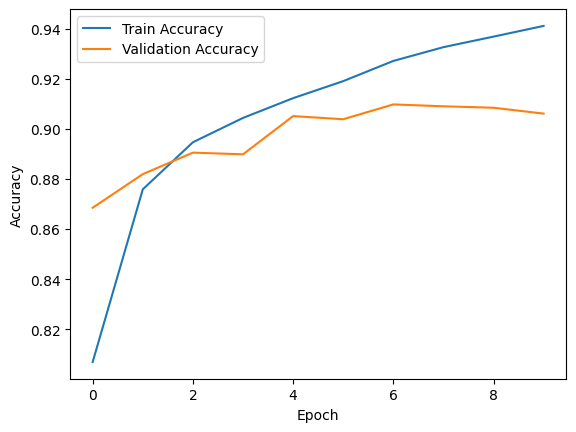

In [8]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

8. Вивести класифікаційний звіт.

In [9]:
y_pred = np.argmax(model.predict(x_test), axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.80      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.85      0.86      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.85      0.88      0.86      1000
      Sandal       0.95      0.98      0.97      1000
       Shirt       0.72      0.78      0.75      1000
     Sneaker       0.97      0.93      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



9. Результати розпізнавання із прогнозованим і справжнім класом.

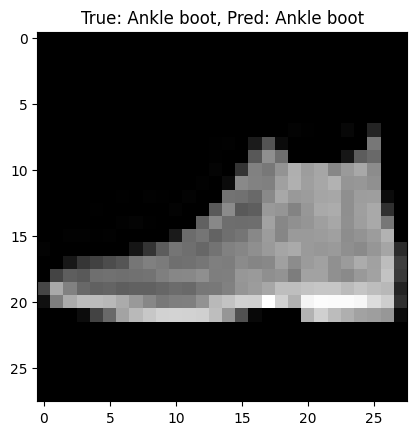

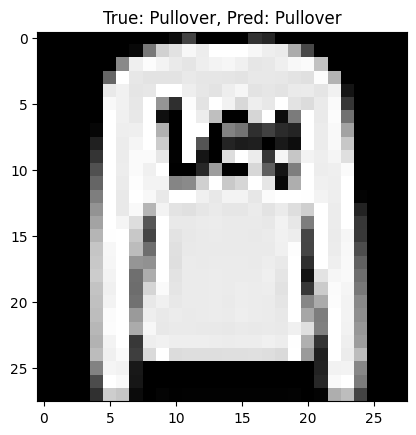

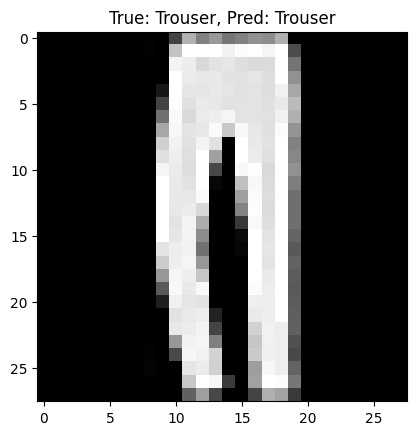

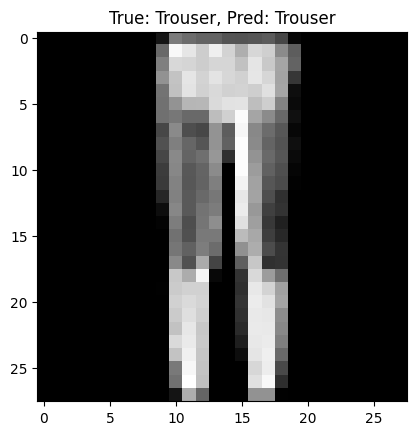

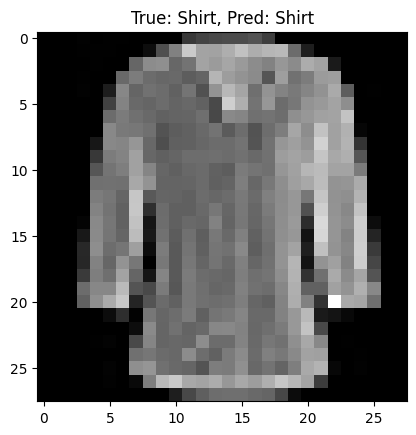

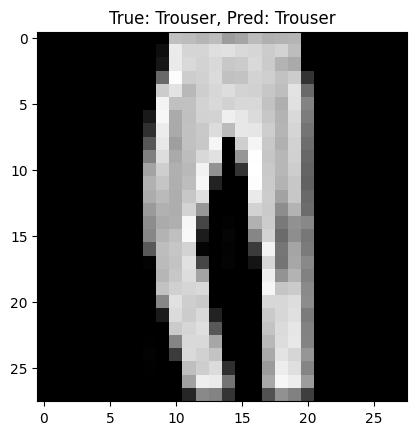

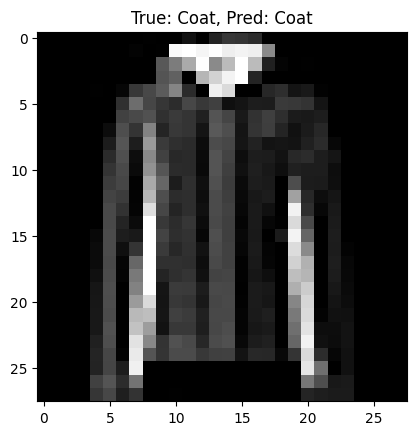

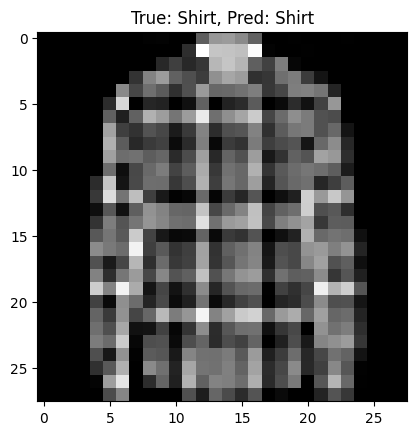

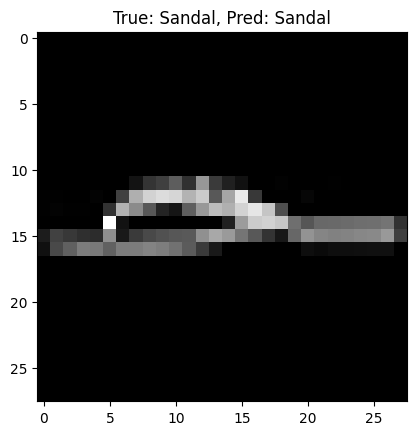

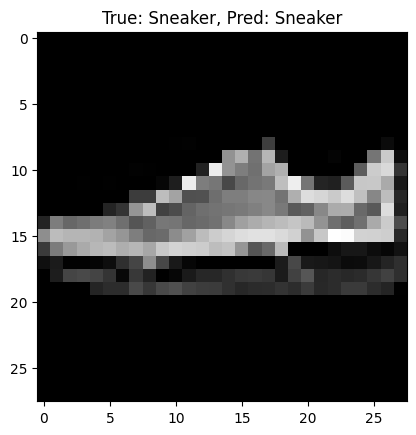

In [10]:
for i in range(10):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {class_names[y_test[i]]}, Pred: {class_names[y_pred[i]]}")
    plt.show()

# Завдання 2

In [ ]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner import HyperModel, RandomSearch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


<ipython-input-30-d0c9e6abdfeb>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch


In [ ]:
# Завантаження даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Додавання виміру каналу (для відповідності архітектурі)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
class FashionMNISTHyperModel(HyperModel):
    def build(self, hp):
        model = models.Sequential()

        # Додаємо перший шар Conv2D
        model.add(layers.Conv2D(
            filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu',
            input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))

        # Додаємо другий шар Conv2D
        model.add(layers.Conv2D(
            filters=hp.Int('conv_2_filters', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

        # Flatten
        model.add(layers.Flatten())

        # Шар Dense
        model.add(layers.Dense(
            units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
            activation='relu'))

        # Вихідний шар
        model.add(layers.Dense(10, activation='softmax'))

        # Компіляція
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        return model


In [ ]:
# Використання Random Search для пошуку найкращих гіперпараметрів
tuner = RandomSearch(
    FashionMNISTHyperModel(),
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='fashion_mnist_tuning'
)

# Пошук гіперпараметрів
tuner.search(x_train, y_train, epochs=10, validation_split=0.2)


Trial 5 Complete [00h 23m 37s]
val_accuracy: 0.9142500162124634

Best val_accuracy So Far: 0.9142500162124634
Total elapsed time: 02h 05m 48s


In [ ]:
# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]

# Використання ранньої зупинки і зменшення швидкості навчання
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Тренування найкращої моделі
history_tuned = best_model.fit(x_train, y_train, epochs=10,
                               validation_split=0.2,
                               callbacks=[early_stop, reduce_lr])


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 111s 73ms/step - accuracy: 0.9492 - loss: 0.1313 - val_accuracy: 0.9052 - val_loss: 0.2871 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 110s 74ms/step - accuracy: 0.9562 - loss: 0.1151 - val_accuracy: 0.9107 - val_loss: 0.3089 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 73ms/step - accuracy: 0.9622 - loss: 0.1011 - val_accuracy: 0.9113 - val_loss: 0.3090 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 109s 73ms/step - accuracy: 0.9694 - loss: 0.0843 - val_accuracy: 0.9154 - val_loss: 0.3155 - learning_rate: 0.0010
Epoch 4: early stopping


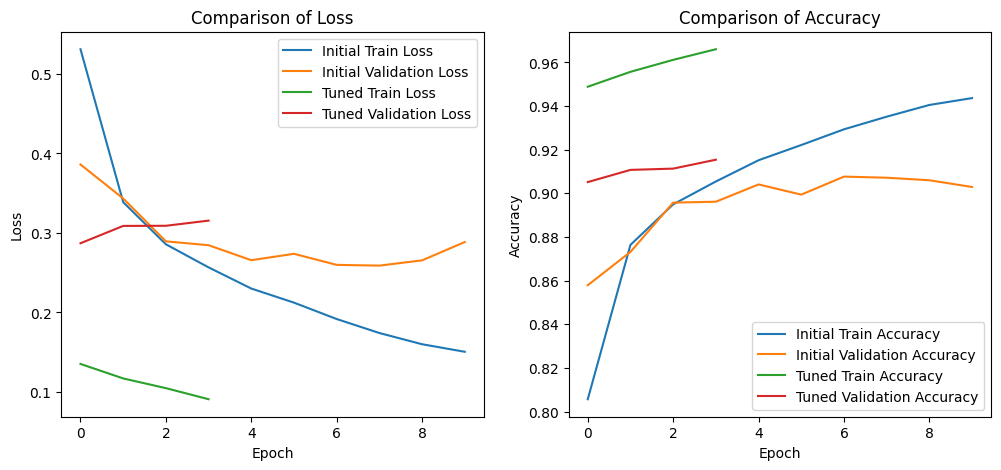

In [ ]:
# Порівняння графіків втрат та точності
def plot_comparison(history1, history2):
    # Порівняння втрат
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['loss'], label='Initial Train Loss')
    plt.plot(history1.history['val_loss'], label='Initial Validation Loss')
    plt.plot(history2.history['loss'], label='Tuned Train Loss')
    plt.plot(history2.history['val_loss'], label='Tuned Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Comparison of Loss')

    # Порівняння точності
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['accuracy'], label='Initial Train Accuracy')
    plt.plot(history1.history['val_accuracy'], label='Initial Validation Accuracy')
    plt.plot(history2.history['accuracy'], label='Tuned Train Accuracy')
    plt.plot(history2.history['val_accuracy'], label='Tuned Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Comparison of Accuracy')

    plt.show()

# Виклик функції для побудови графіків порівняння
plot_comparison(history, history_tuned)


In [ ]:
# Прогноз для початкової та настроєної моделей
y_pred_initial = np.argmax(model.predict(x_test), axis=1)
y_pred_tuned = np.argmax(best_model.predict(x_test), axis=1)

# Класифікаційний звіт для обох моделей
print("Initial Model Classification Report:")
print(classification_report(y_test, y_pred_initial, target_names=class_names))

print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=class_names))
